# Intel Image Classififcation CNN 
## Convolutional Neural Network

### Table of contents

1. Imports 
2. Paths 
3. Load and transform images
4. Create and train model
5. Analyze model

### 1. Imports

In [52]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import pandas as pd
from keras.applications.vgg16 import VGG16
import tensorflow.keras.utils as image_processing
from keras.applications.vgg16 import preprocess_input
from sklearn.metrics import accuracy_score
from keras.layers import Input
from PIL import Image
from sklearn import metrics

### 2. Paths

In [53]:
CURR_DIR_PATH = os.getcwd()

# Training paths
seg_train_path = CURR_DIR_PATH + "//data//seg_train//seg_train"

train_forest_path = seg_train_path + "//forest"
train_buildings_path = seg_train_path + "//buildings"
train_glacier_path = seg_train_path + "//glacier"
train_mountain_path = seg_train_path + "//mountain"
train_sea_path = seg_train_path + "//sea"
train_street_path = seg_train_path + "//street"

# Test paths
seg_test_path = CURR_DIR_PATH + "//data//seg_test//seg_test"

test_forest_path = seg_test_path + "//forest"
test_buildings_path = seg_test_path + "//buildings"
test_glacier_path = seg_test_path + "//glacier"
test_mountain_path = seg_test_path + "//mountain"
test_sea_path = seg_test_path + "//sea"
test_street_path = seg_test_path + "//street"

# Prediction path
seg_pred_path = CURR_DIR_PATH + "//data//seg_pred//seg_pred"

# Our path
seg_our_path = CURR_DIR_PATH + "//data//seg_our//seg_our"

### 3. Load and transform images

In [54]:
def load_data(paths):
    images = []
    labels = []
    label = -1
    for path in paths:
        label = label+1
        for file in tqdm(os.listdir(path)):
            image_path = os.path.join(path, file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(150, 150)) 
            image = image/ 255.0
            images.append(image)
            labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    output = (images,labels)
    return output

Load images to training and testing data sets

In [55]:
train_paths = [train_buildings_path, train_forest_path, train_glacier_path, train_mountain_path, train_sea_path, train_street_path]
test_paths = [test_buildings_path, test_forest_path, test_glacier_path, test_mountain_path, test_sea_path, test_street_path]
train_images, train_labels= load_data(train_paths)
print (f"Number of training images: {train_labels.shape[0]}")
test_images, test_labels = load_data(test_paths)
print (f"Number of testing images: {test_labels.shape[0]}")

100%|██████████| 2382/2382 [00:09<00:00, 246.39it/s]


Number of training images: 14034


100%|██████████| 501/501 [00:01<00:00, 482.57it/s]


Number of testing images: 3000


In [56]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

### 5. Create and train model

Layers

We add layers to the model with values/specifications that fits our images.

- Conv2D: We set 32 filters of kernel size (3x3) which is the most commonly used. This layer creates a convolution kernel (32 filters) that produces a set of feature maps.

- MaxPooling2D: W edown-sample the input data into a pool size of (2,2), which means the output of this layer will have half the spatial resolution of the inputs.

- Flatten: This converts our input tensor from a 2D tensor into 1D (dimension). 

- Dense: This is a connect layer, it tasks a 1D input tensor and applies a set of weights and biases to compute a single output value for each element in the tensor (usually comes at the end, after we flatten the tensor into 1D).


In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

Compile the model

The compile method configures the learning process of the model.

- optimizer: 'adam' is a popular gradient-based optimization algorithm.

- loss: this is used to evaluate the models performance during training.

- metrics: We specify the metrics that will be used to evaluate the models performance. 'Accuracy' measures the fraction of correctly classified samples.


In [58]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Fit/train model

Fit the model to the data from the training set. The neural network will learn by itself the pattern in order to distinguish each category.

Different results can be achieved by adjusting 'batch_size' and 'epochs'. 

In [59]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, validation_split = 0.2)

Epoch 1/40
88/88 [==============================] - 131s 1s/step - loss: 1.1739 - accuracy: 0.5611 - val_loss: 0.8557 - val_accuracy: 0.6908
Epoch 2/40
88/88 [==============================] - 119s 1s/step - loss: 0.7760 - accuracy: 0.7131 - val_loss: 0.8367 - val_accuracy: 0.6858
Epoch 3/40
88/88 [==============================] - 119s 1s/step - loss: 0.6377 - accuracy: 0.7665 - val_loss: 0.7048 - val_accuracy: 0.7414
Epoch 4/40
88/88 [==============================] - 115s 1s/step - loss: 0.4979 - accuracy: 0.8231 - val_loss: 0.6957 - val_accuracy: 0.7417
Epoch 5/40
88/88 [==============================] - 110s 1s/step - loss: 0.3947 - accuracy: 0.8631 - val_loss: 0.6870 - val_accuracy: 0.7624
Epoch 6/40
88/88 [==============================] - 114s 1s/step - loss: 0.2758 - accuracy: 0.9095 - val_loss: 0.7562 - val_accuracy: 0.7563
Epoch 7/40
88/88 [==============================] - 123s 1s/step - loss: 0.1805 - accuracy: 0.9457 - val_loss: 0.7594 - val_accuracy: 0.7695
Epoch 8/40
88

### 6. Analyze model

Plot the accuracy and training loss

In [60]:
def plot_accuracy_loss(history):

    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

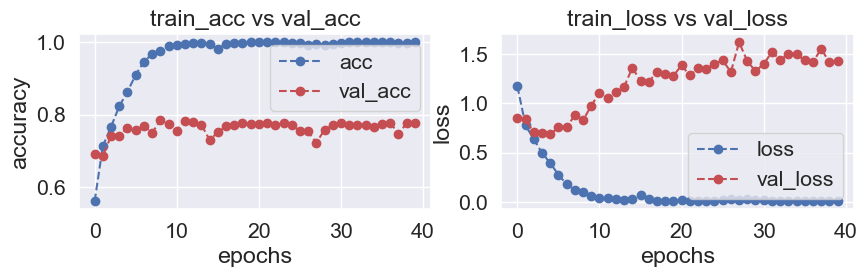

In [61]:
plot_accuracy_loss(history)

In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Create dataframe in order to analyze training accuracy and test accuracy

In [62]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
bi_db = pd.DataFrame({'training_accuracy':train_acc, 
                      'test_accuracy' : test_acc})

bi_db.to_csv('cnn_acc.csv', index=False)

Evaluate the model's performance on the test set

In [63]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 10s 104ms/step - loss: 1.4584 - accuracy: 0.7663


In [64]:
category_label=['buildings','forest', 'glacier','mountain','sea','street']
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

94/94 [==============================] - 9s 96ms/step


Classification report

Evaluate the accuracy of the model and look at the precision, recall, f1-score and support for each category.

- precision: measures the proportions of true positive predictions out of all the positive predictions. (precision = TP/(TP + FP)).

- recall: measures the proportion of the true positive predictions out of all actual positive samples. (recall = TP/(TP + FN)).

- f1-score: is the harmonic mean of precision and recall. Basically, it  is a measure of the balance between precision and recall. (f1-score = 2 * (precision * recall) / (precision + recall))

- support: is the number of samples of the true response that lie in that class/category.

In [65]:
report = metrics.classification_report(test_labels, pred_labels, target_names = category_label)
print(report)

              precision    recall  f1-score   support

   buildings       0.74      0.68      0.71       437
      forest       0.93      0.94      0.93       474
     glacier       0.71      0.74      0.73       553
    mountain       0.70      0.67      0.69       525
         sea       0.76      0.73      0.74       510
      street       0.77      0.84      0.80       501

    accuracy                           0.77      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.77      0.77      0.77      3000



Predictions on random images from the trained model

In [66]:
def display_random_image(category_label, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Image #{index} : {category_label[labels[index]]} ')
    plt.show()

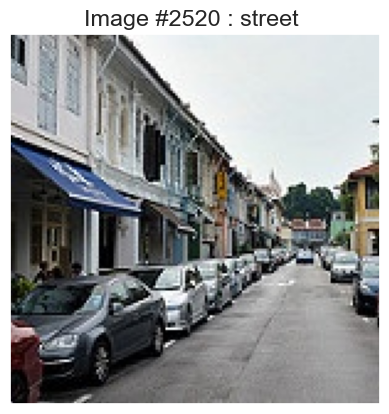

In [67]:
display_random_image(category_label, test_images, pred_labels)

Analyze and display mislabeled images

Detect and analyze which images are most difficult to classify, by displaying 25 mislabeled images.

In [68]:
def display_examples(category_label, images, labels):

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(category_label[labels[i]])
    plt.show()

In [69]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
 
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels) 


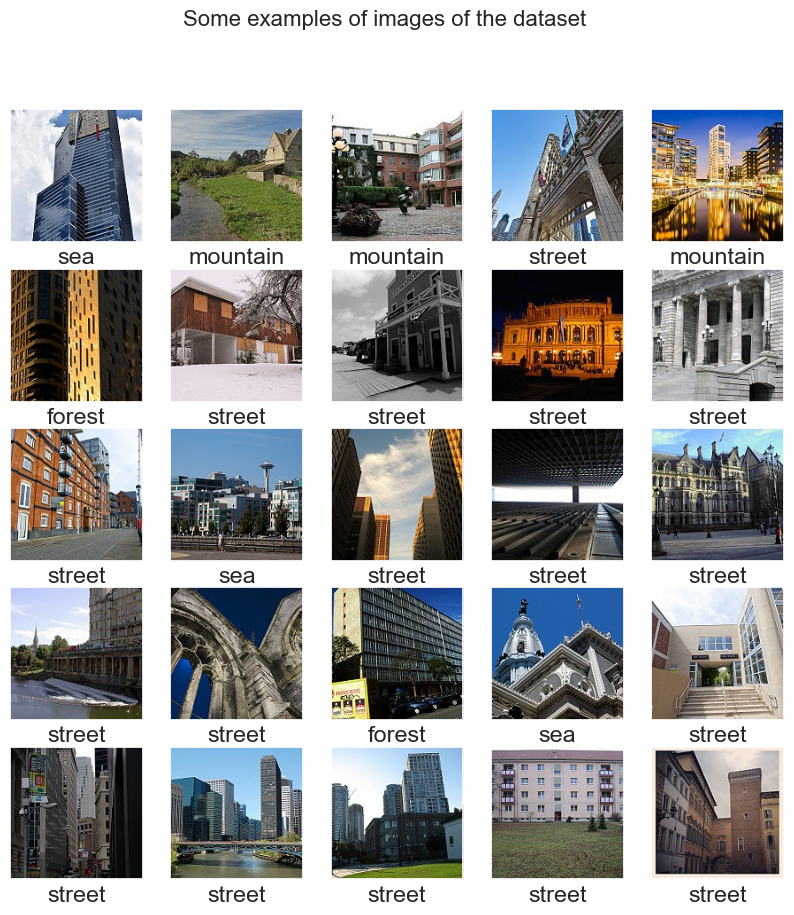

In [70]:
print_mislabeled_images(category_label, test_images, test_labels, pred_labels)

Further analysis of what images are difficult to label/classify. The confusion matrix illustrates this.

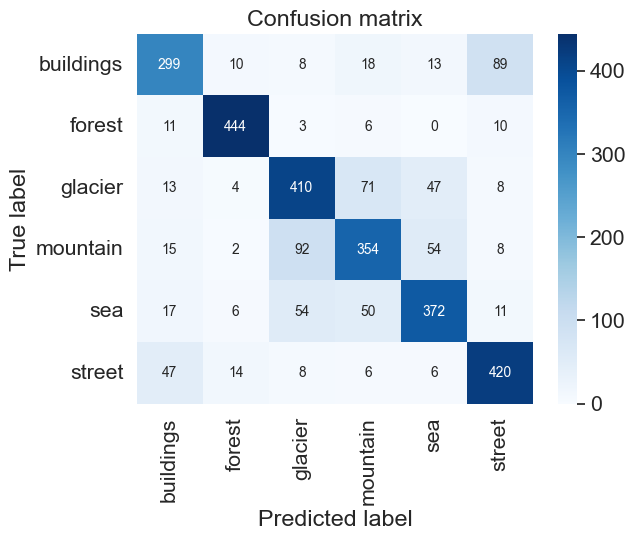

In [71]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=category_label, 
           yticklabels=category_label, ax = ax, cmap = 'Blues', fmt = '.0f')
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.show()

Probability and accuracy

Display the probability that the model has concluded for each of the six classes/categories, on different images.    

In [72]:
def processing(path):
    img = cv2.imread(path)
    test1_proc = image_processing.load_img(path , target_size=(150,150))
    test1_proc_1 = image_processing.img_to_array(test1_proc)
    t1 = np.expand_dims(test1_proc ,axis=0)
    t1 = t1/255
    pred_classes = model.predict(t1)
    pred = np.argmax(pred_classes ,axis=1)

    plt.subplot(121)
    pic = Image.open(path) 
    plt.xlabel("Original Image")
    plt.imshow(pic)
    
    
    plt.subplot(122)

    s1 = pd.Series(pred_classes.ravel() , index = category_label)
    s1.plot(kind = 'bar' ,figsize = (10,5))
    plt.xlabel("prediction")
    
    plt.show()

Images from the dataset

1/1 [==============================] - 0s 39ms/step


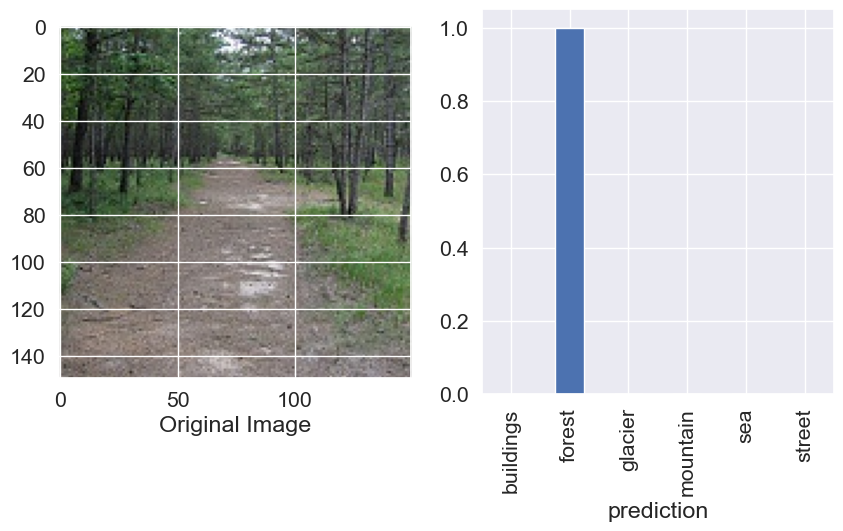

1/1 [==============================] - 0s 44ms/step


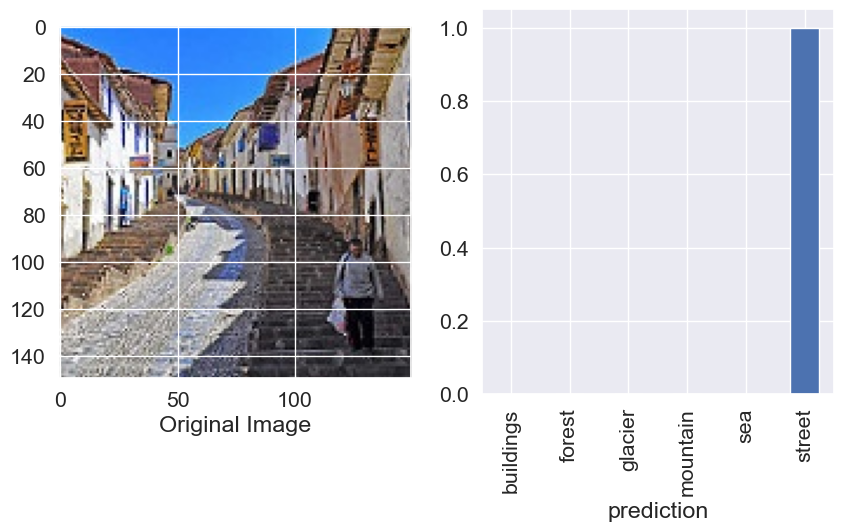

1/1 [==============================] - 0s 29ms/step


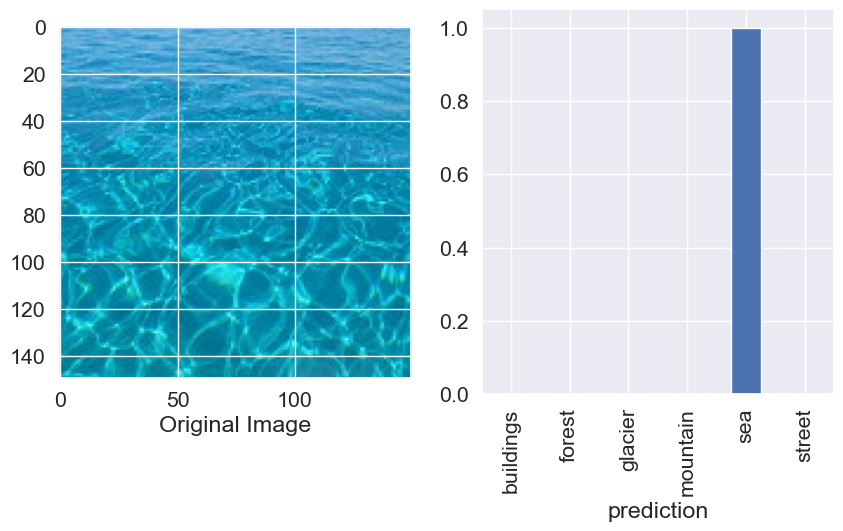

In [73]:
processing(seg_test_path + "/forest/20056.jpg")
processing(test_street_path + "/20297.jpg")
processing(test_sea_path + "//21259.jpg")

Our images

1/1 [==============================] - 0s 26ms/step


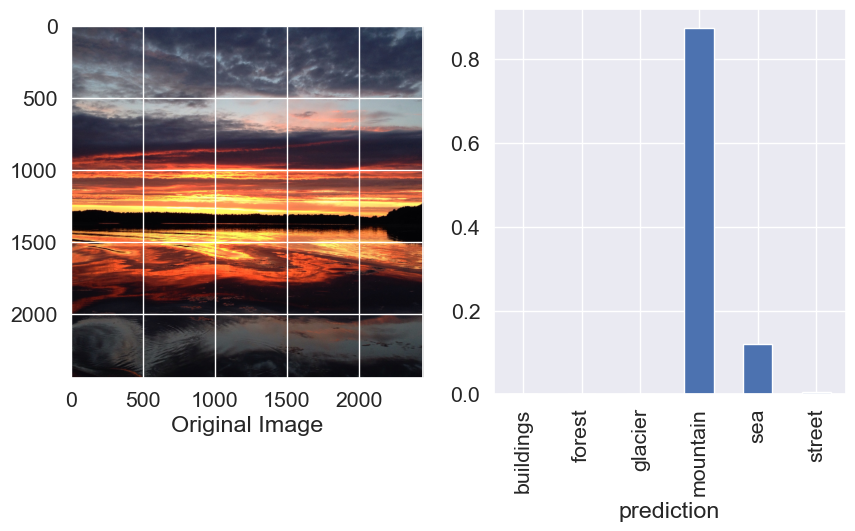

1/1 [==============================] - 0s 26ms/step


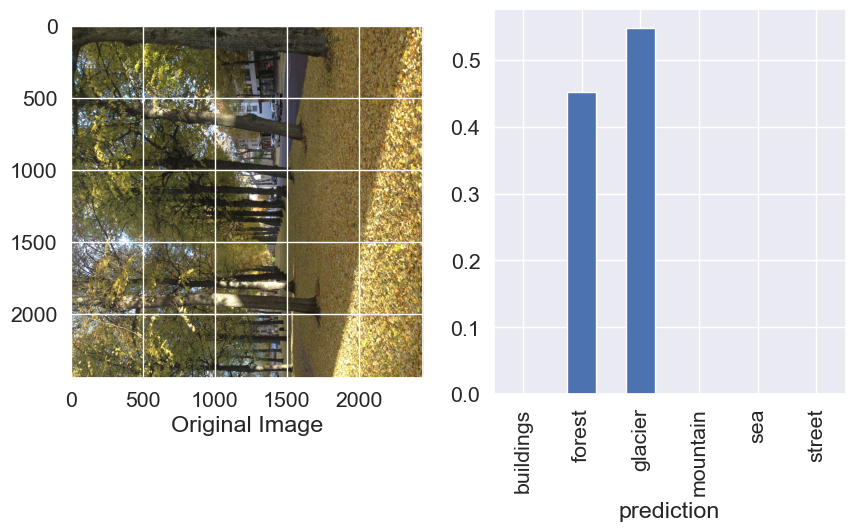

1/1 [==============================] - 0s 29ms/step


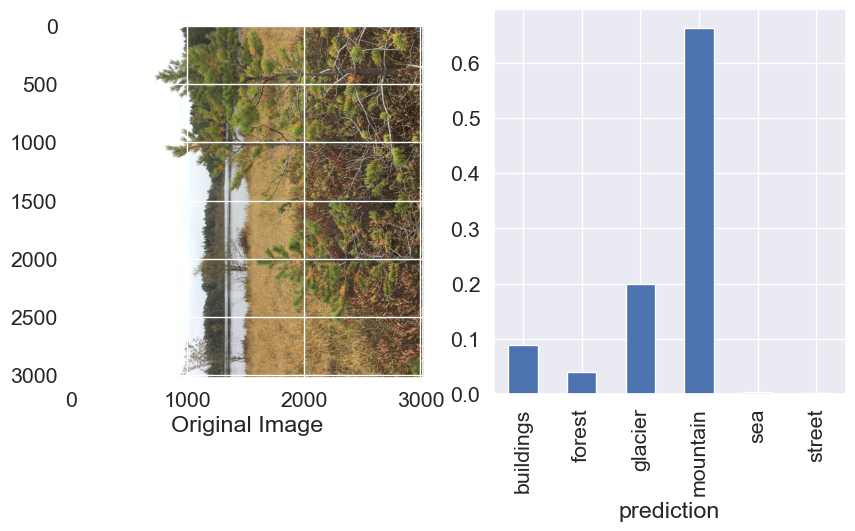

1/1 [==============================] - 0s 29ms/step


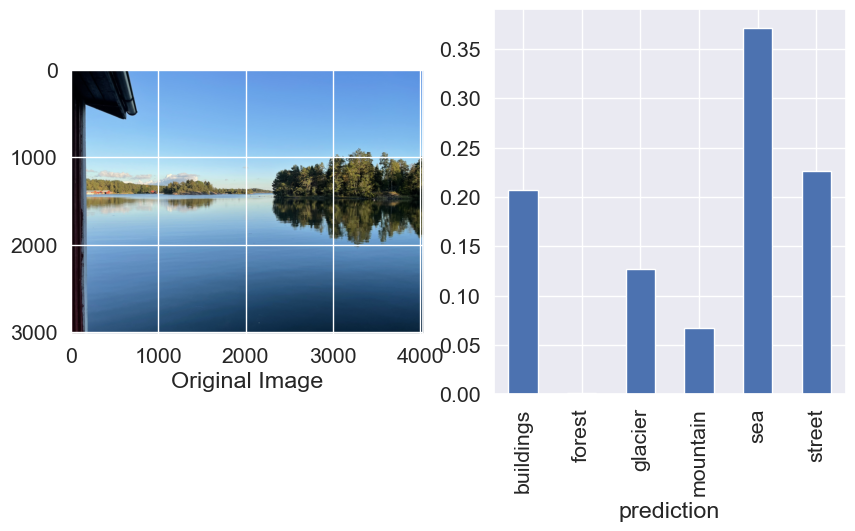

1/1 [==============================] - 0s 28ms/step


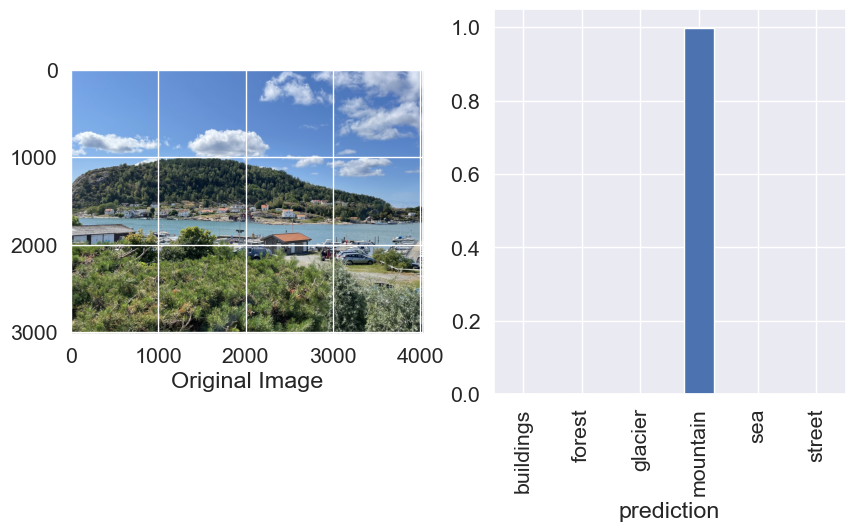

1/1 [==============================] - 0s 34ms/step


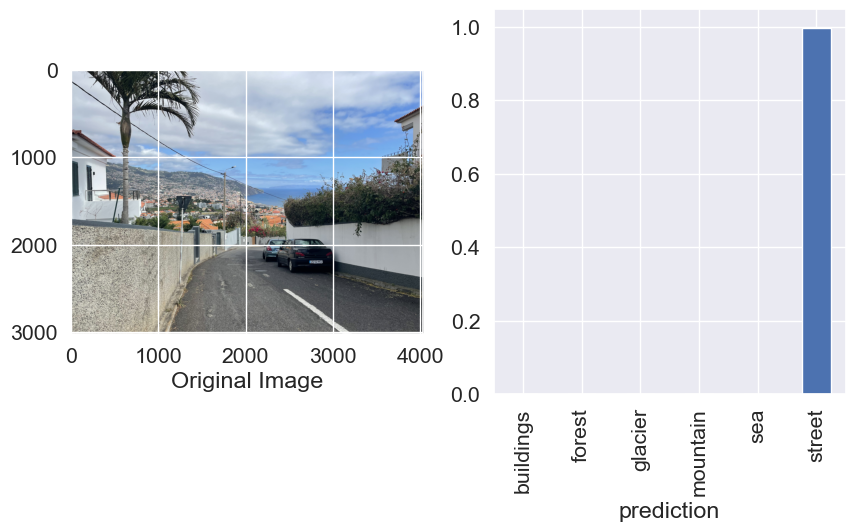

1/1 [==============================] - 0s 26ms/step


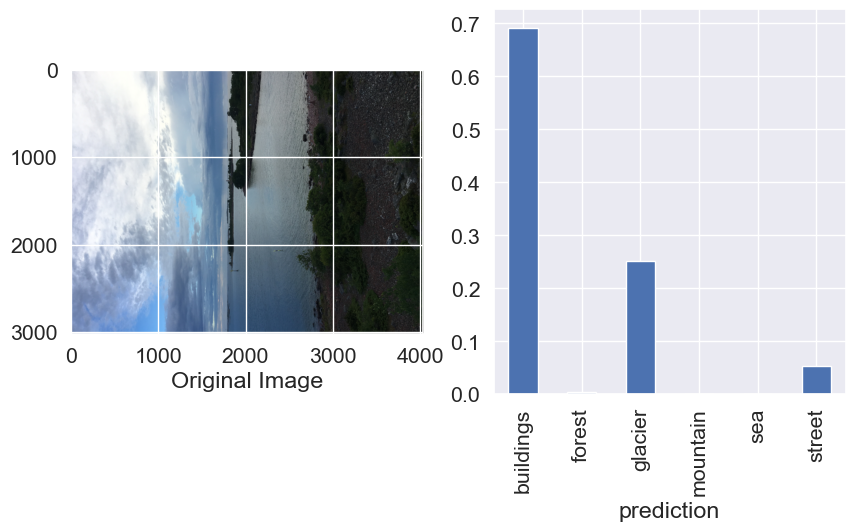

1/1 [==============================] - 0s 28ms/step


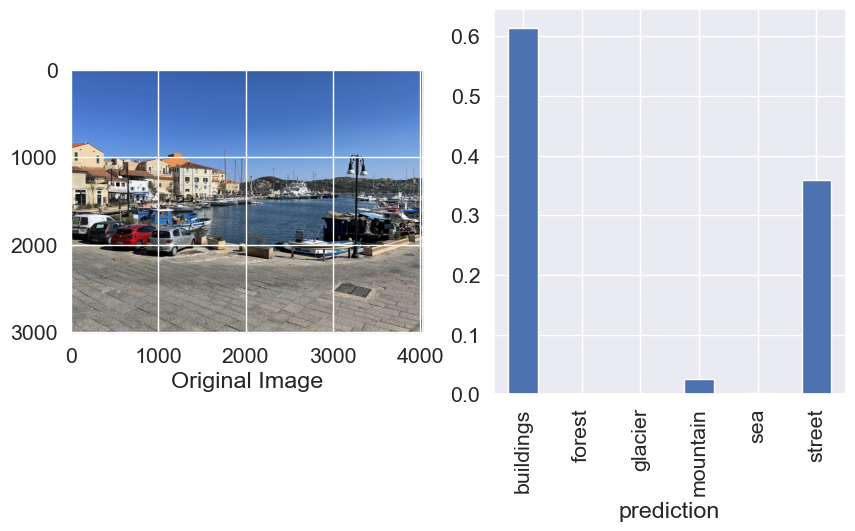

1/1 [==============================] - 0s 27ms/step


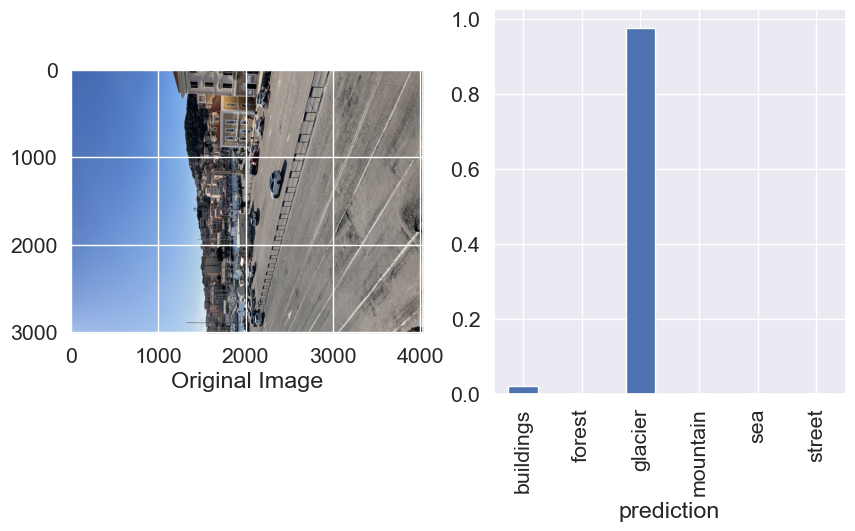

1/1 [==============================] - 0s 26ms/step


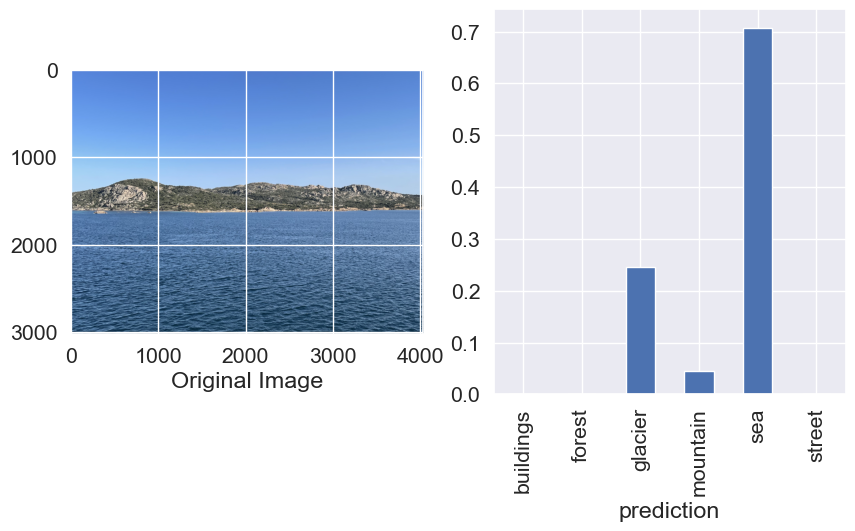

1/1 [==============================] - 0s 25ms/step


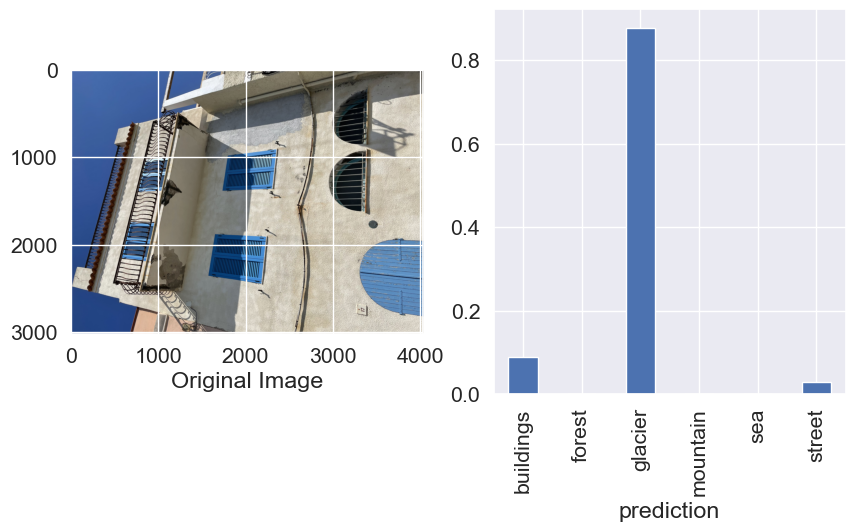

1/1 [==============================] - 0s 25ms/step


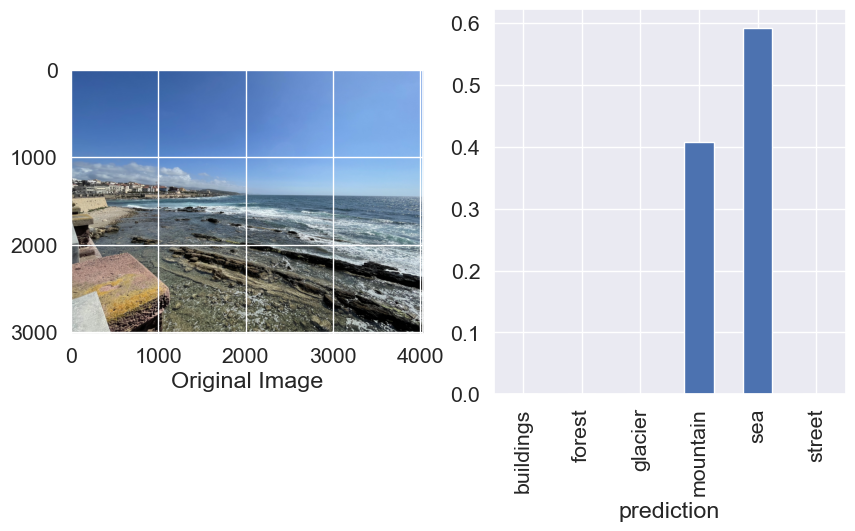

In [74]:
for file in os.listdir(seg_our_path)[:12]:
    image_path = (os.path.join(seg_our_path, file))
    processing(image_path)